In [1]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

import numpy as np

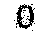

In [2]:
import PIL
import numpy
basewidth = 50
pil_image = PIL.Image.open('image_sample/0/3.jpg').convert('1') 
wpercent = (basewidth/float(pil_image.size[0]))
hsize = int((float(pil_image.size[1])*float(wpercent)))
img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
img

Populating the interactive namespace from numpy and matplotlib


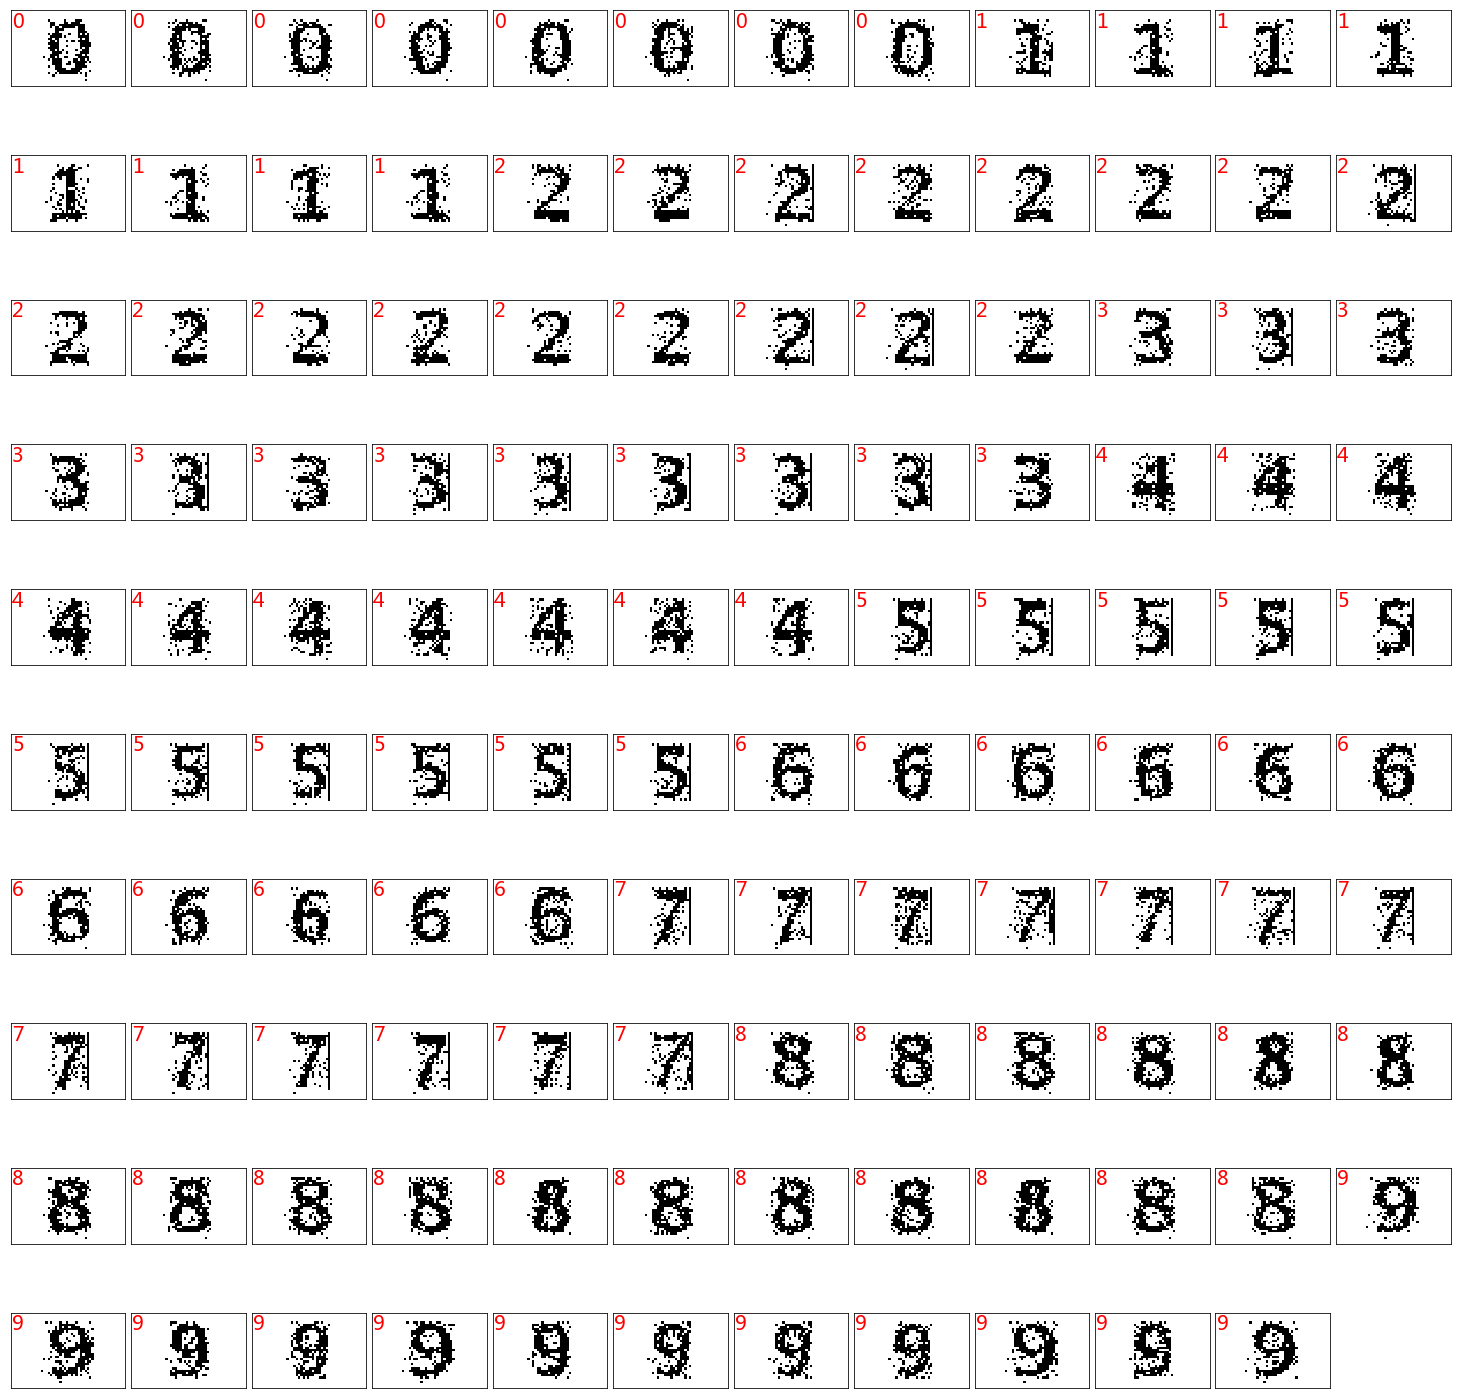

In [3]:
%pylab inline
import os
digits = []
labels = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(0,10):
    for img in os.listdir('image_sample/{}/'.format(i)):
        pil_image = PIL.Image.open('image_sample/{}/{}'.format(i, img)).convert('1') 
    
        wpercent = (basewidth/float(pil_image.size[0]))
        hsize = int((float(pil_image.size[1])*float(wpercent)))
        img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
        
        ax = fig.add_subplot(10, 12, cnt+1, xticks=[], yticks=[])
        ax.imshow(img,cmap=plt.cm.binary,interpolation='nearest')
        ax.text(0, 7, str(i), color="red", fontsize = 20)        
        cnt = cnt + 1
        
        digits.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)

In [4]:
import numpy
digit_ary  = numpy.array(digits)

In [5]:
digit_ary.shape

(119, 1650)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digit_ary)
X_scaled = scaler.transform(digit_ary)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 3000)
mlp.fit(X_scaled,labels)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [8]:
predicted = mlp.predict(X_scaled)

In [9]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [10]:
target = numpy.array(labels)

In [11]:
predicted == target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

Populating the interactive namespace from numpy and matplotlib


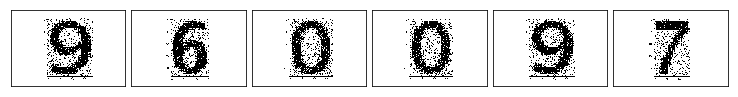

In [12]:
%pylab inline
import os
import PIL

fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for idx, img in enumerate(os.listdir('image_sample/prediction/')):
    pil_image = PIL.Image.open('image_sample/prediction/{}'.format(img)).convert('1') 
    ax = fig.add_subplot(10, 12, idx+1, xticks=[], yticks=[])
    ax.imshow(pil_image,cmap=plt.cm.binary,interpolation='nearest')

In [13]:
%pylab inline
import os
data = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for idx, img in enumerate(os.listdir('image_sample/prediction/')):
    pil_image = PIL.Image.open('image_sample/prediction/{}'.format(img)).convert('1') 
    
    wpercent = (basewidth/float(pil_image.size[0]))
    hsize = int((float(pil_image.size[1])*float(wpercent)))
    img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
    data.append([pixel for pixel in iter(img.getdata())])

Populating the interactive namespace from numpy and matplotlib


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [19]:
mlp.predict(data_scaled)

array([9, 6, 0, 0, 9, 7])